Not completed yet

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sqlalchemy import create_engine, inspect


In [3]:
# Function to load data from SQLite database
def load_data_from_sqlite(db_name, table_name):
    db_path = f'../data/{db_name}.db'
    engine = create_engine(f'sqlite:///{db_path}')
    
    # List tables to ensure the table names are correct
    inspector = inspect(engine)
    available_tables = inspector.get_table_names()
    print("Available tables in the database:", available_tables)
    
    if table_name not in available_tables:
        raise ValueError(f"Table {table_name} not found in the database.")
    
    # Load data from the specified table
    df = pd.read_sql_table(table_name, con=engine)
    return df


try:
    air_quality_df = load_data_from_sqlite('AirQuality', 'data')
    print("Air Quality Data Loaded Successfully")
except Exception as e:
    print(f"Error loading air quality data: {e}")

try:
    inorganic_gases_df = load_data_from_sqlite('InorganicGases', 'InorganicGases_2017')
    print("Inorganic Gases Data Loaded Successfully")
except Exception as e:
    print(f"Error loading inorganic gases data: {e}")

# Continue with EDA if the data is loaded successfully
if 'air_quality_df' in locals():
    print("\nAir Quality Dataset:")
    print(air_quality_df.head())

if 'inorganic_gases_df' in locals():
    print("\nInorganic Gases Dataset:")
    print(inorganic_gases_df.head())


Available tables in the database: ['data', 'test']
Air Quality Data Loaded Successfully
Available tables in the database: ['InorganicGases_2017']
Inorganic Gases Data Loaded Successfully

Air Quality Dataset:
         Date      Open      High       Low     Close  Adj Close    Volume
0  2018-07-02 -0.881489 -0.852443 -0.852833 -0.818300  -0.849975 -1.007510
1  2018-07-03 -0.804697 -0.840088 -0.850488 -0.880903  -0.909766 -1.248103
2  2018-07-05 -0.853635 -0.869360 -0.836027 -0.852482  -0.882621 -1.079315
3  2018-07-06 -0.850540 -0.830964 -0.818049 -0.803129  -0.835486 -1.023188
4  2018-07-09 -0.771621 -0.788195 -0.737930 -0.753009  -0.787615 -0.878482

Inorganic Gases Dataset:
                  DateTime        NO       NO2       NOx       SO2        O3  \
0  2017-01-01 00:00:00.000  0.259070  0.348016  0.419472  0.029600 -8.194955   
1  2017-01-01 00:10:00.000  0.238364  0.242131  0.335932  0.030158 -8.194955   
2  2017-01-01 00:20:00.000  0.302488  0.208156  0.365495  0.030308 -8.19495

In [4]:
# Display descriptive statistics for both datasets
print("Descriptive Statistics for Air Quality Data:")
print(air_quality_df.describe())
print("\nDescriptive Statistics for Inorganic Gases Data:")
print(inorganic_gases_df.describe())

Descriptive Statistics for Air Quality Data:
               Open          High           Low         Close     Adj Close  \
count  5.030000e+02  5.030000e+02  5.030000e+02  5.030000e+02  5.030000e+02   
mean   1.695132e-16 -2.260176e-16 -2.260176e-16  6.780527e-16 -5.650439e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.652115e+00 -1.642803e+00 -1.662236e+00 -1.682258e+00 -1.656852e+00   
25%   -7.300331e-01 -7.322161e-01 -7.208313e-01 -7.347655e-01 -7.408596e-01   
50%   -2.609649e-01 -2.548258e-01 -2.747999e-01 -2.752295e-01 -3.045521e-01   
75%    7.021244e-01  6.838927e-01  7.023653e-01  7.016442e-01  7.177504e-01   
max    2.623081e+00  2.665590e+00  2.642137e+00  2.625818e+00  2.623239e+00   

             Volume  
count  5.030000e+02  
mean   2.472067e-17  
std    1.000000e+00  
min   -1.413285e+00  
25%   -6.777512e-01  
50%   -2.445818e-01  
75%    3.877323e-01  
max    4.661854e+00  

Descriptive Statistics for Inorganic Gases D

In [7]:
# Data Cleaning and Preprocessing

# Handle missing values if any
print("Missing values in Air Quality Data:")
print(air_quality_df.isnull().sum())

print("Missing values in Inorganic Gases Data:")
print(inorganic_gases_df.isnull().sum())

#  the 'Date' and 'DateTime' columns are in datetime format
air_quality_df['Date'] = pd.to_datetime(air_quality_df['Date'])
inorganic_gases_df['DateTime'] = pd.to_datetime(inorganic_gases_df['DateTime'])

# Normalize numeric columns if not already done
def normalize(df, columns):
    for column in columns:
        df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df

air_quality_df = normalize(air_quality_df, ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
inorganic_gases_df = normalize(inorganic_gases_df, ['NO', 'NO2', 'NOx', 'SO2', 'O3', 'CO_ppm'])


Missing values in Air Quality Data:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values in Inorganic Gases Data:
DateTime    0
NO          0
NO2         0
NOx         0
SO2         0
O3          0
CO_ppm      0
dtype: int64


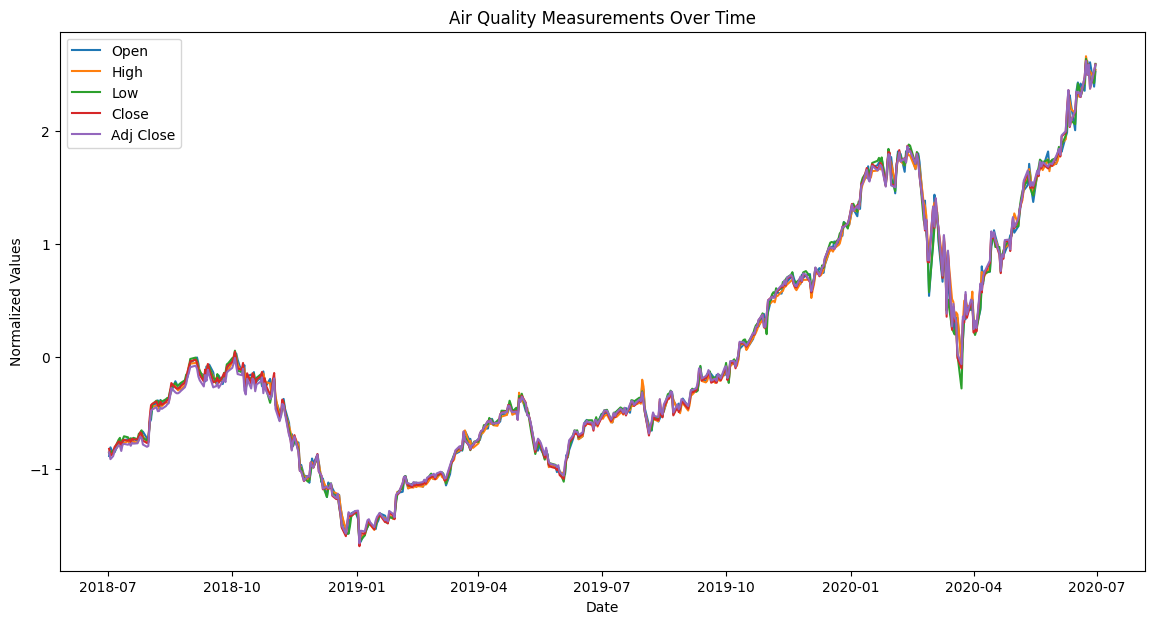

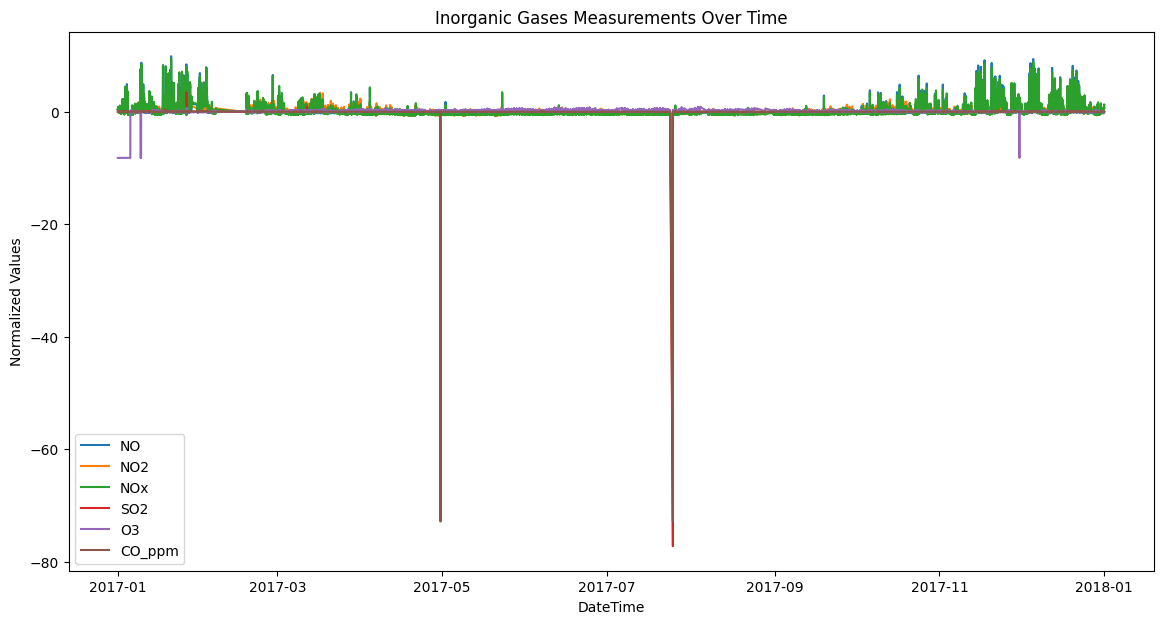

Correlation Matrix for Air Quality Data:
               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.780896  0.786104  0.778499  0.782422   0.795844   
Open       0.780896  1.000000  0.998759  0.998712  0.997538   0.997293   
High       0.786104  0.998759  1.000000  0.997928  0.998533   0.998427   
Low        0.778499  0.998712  0.997928  1.000000  0.998674   0.998328   
Close      0.782422  0.997538  0.998533  0.998674  1.000000   0.999744   
Adj Close  0.795844  0.997293  0.998427  0.998328  0.999744   1.000000   
Volume     0.157415  0.107999  0.132497  0.081395  0.102279   0.104653   

             Volume  
Date       0.157415  
Open       0.107999  
High       0.132497  
Low        0.081395  
Close      0.102279  
Adj Close  0.104653  
Volume     1.000000  

Correlation Matrix for Inorganic Gases Data:
          DateTime        NO       NO2       NOx       SO2        O3    CO_ppm
DateTime  1.000000  0.043356 -0.030628  0.016098 -0.004038  0.174

In [8]:
# Time Series Analysis
import matplotlib.pyplot as plt

# Plot trends for Air Quality data
plt.figure(figsize=(14, 7))
for column in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
    plt.plot(air_quality_df['Date'], air_quality_df[column], label=column)
plt.title('Air Quality Measurements Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()

# Plot trends for Inorganic Gases data
plt.figure(figsize=(14, 7))
for column in ['NO', 'NO2', 'NOx', 'SO2', 'O3', 'CO_ppm']:
    plt.plot(inorganic_gases_df['DateTime'], inorganic_gases_df[column], label=column)
plt.title('Inorganic Gases Measurements Over Time')
plt.xlabel('DateTime')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()

# Correlation Analysis
print("Correlation Matrix for Air Quality Data:")
print(air_quality_df.corr())

print("\nCorrelation Matrix for Inorganic Gases Data:")
print(inorganic_gases_df.corr())


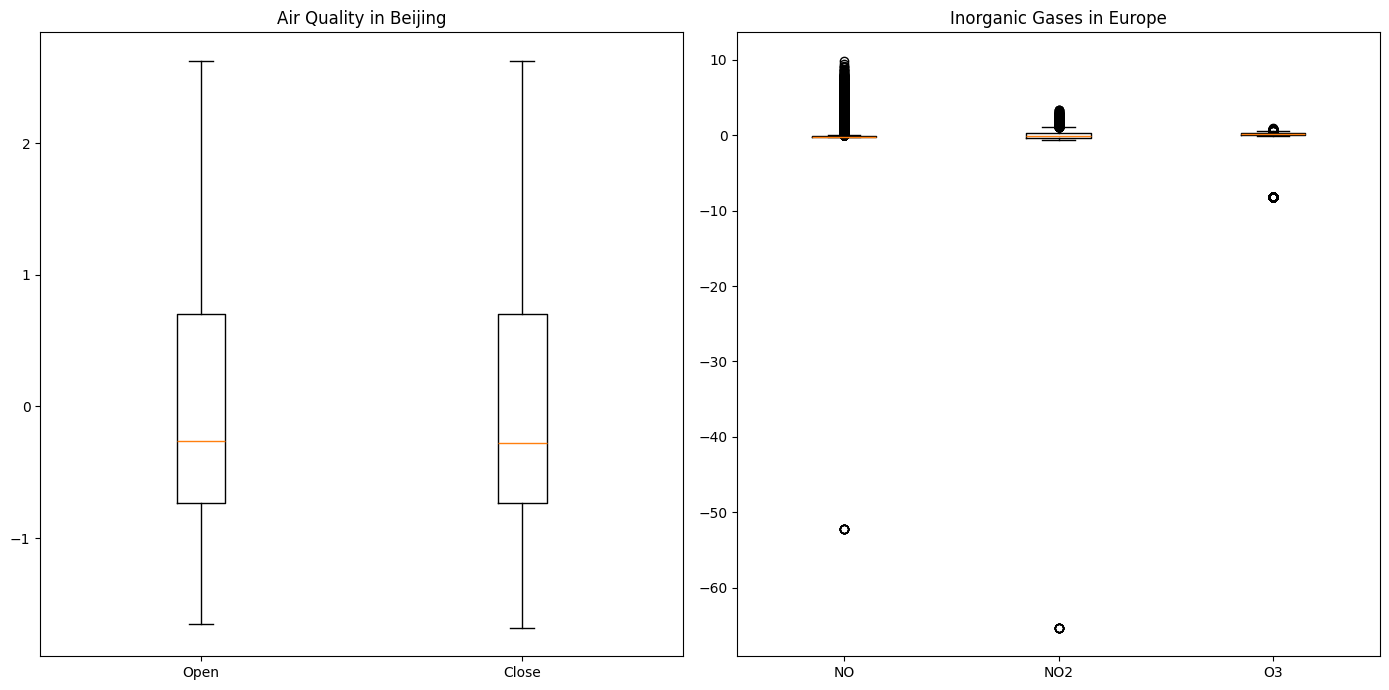

In [9]:
# Comparative Analysis

# Compare pollutant levels between datasets
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.boxplot([air_quality_df['Open'], air_quality_df['Close']])
plt.title('Air Quality in Beijing')
plt.xticks([1, 2], ['Open', 'Close'])

plt.subplot(1, 2, 2)
plt.boxplot([inorganic_gases_df['NO'], inorganic_gases_df['NO2'], inorganic_gases_df['O3']])
plt.title('Inorganic Gases in Europe')
plt.xticks([1, 2, 3], ['NO', 'NO2', 'O3'])

plt.tight_layout()
plt.show()



In [10]:
# Modeling and Prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = air_quality_df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = air_quality_df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))



Model Performance:
Mean Squared Error: 0.0005010842881653771
R-squared: 0.9995392542121403


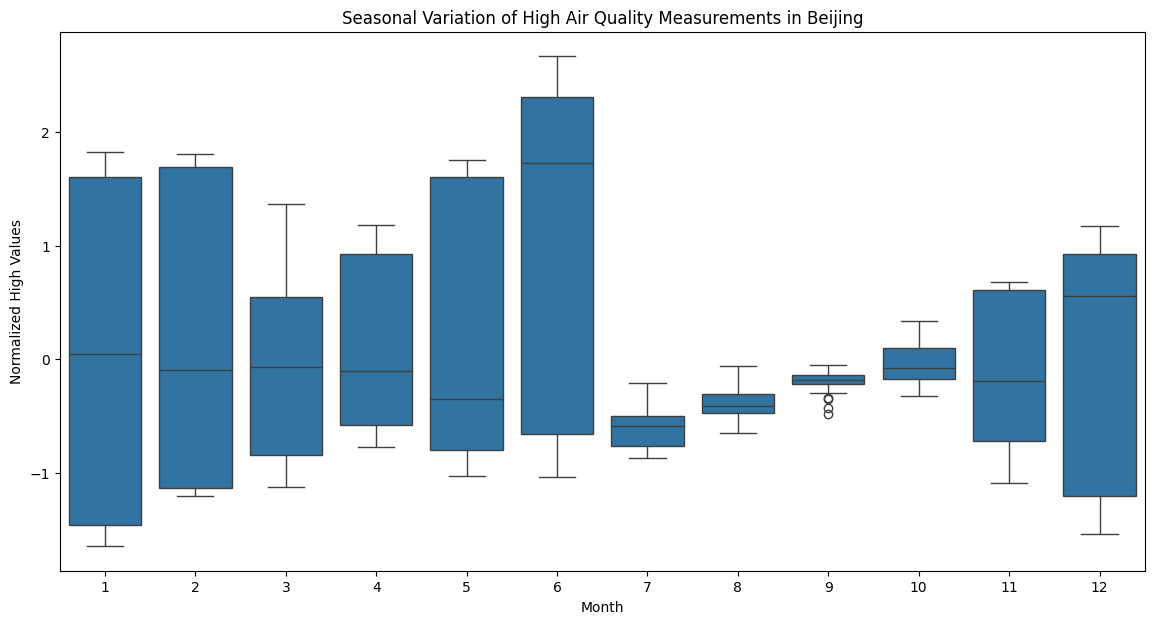

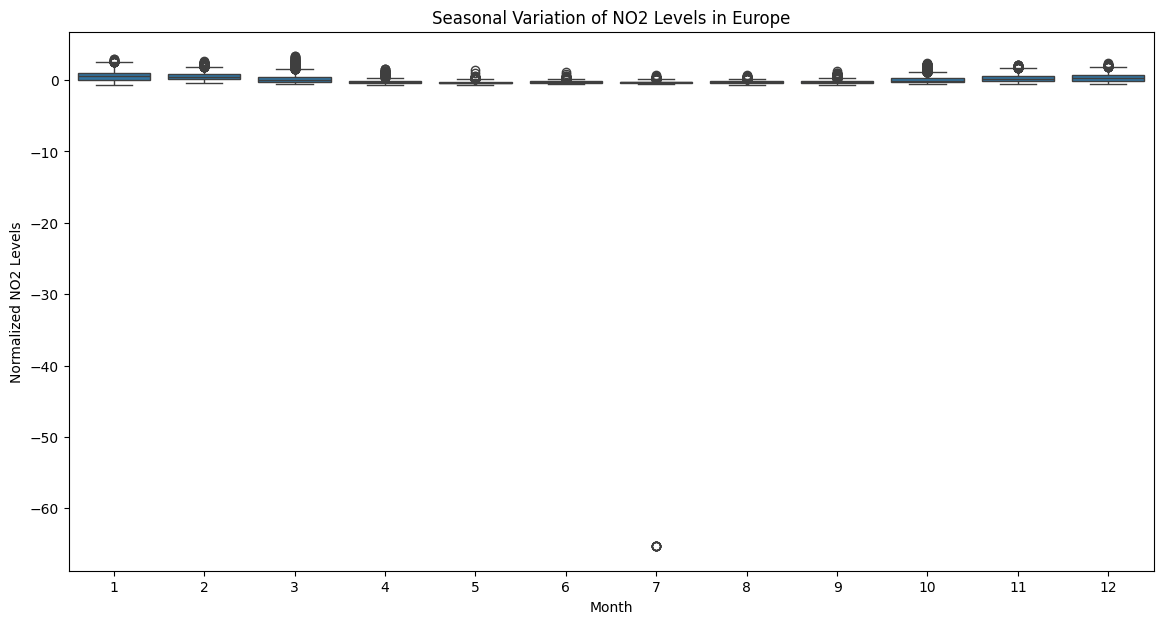

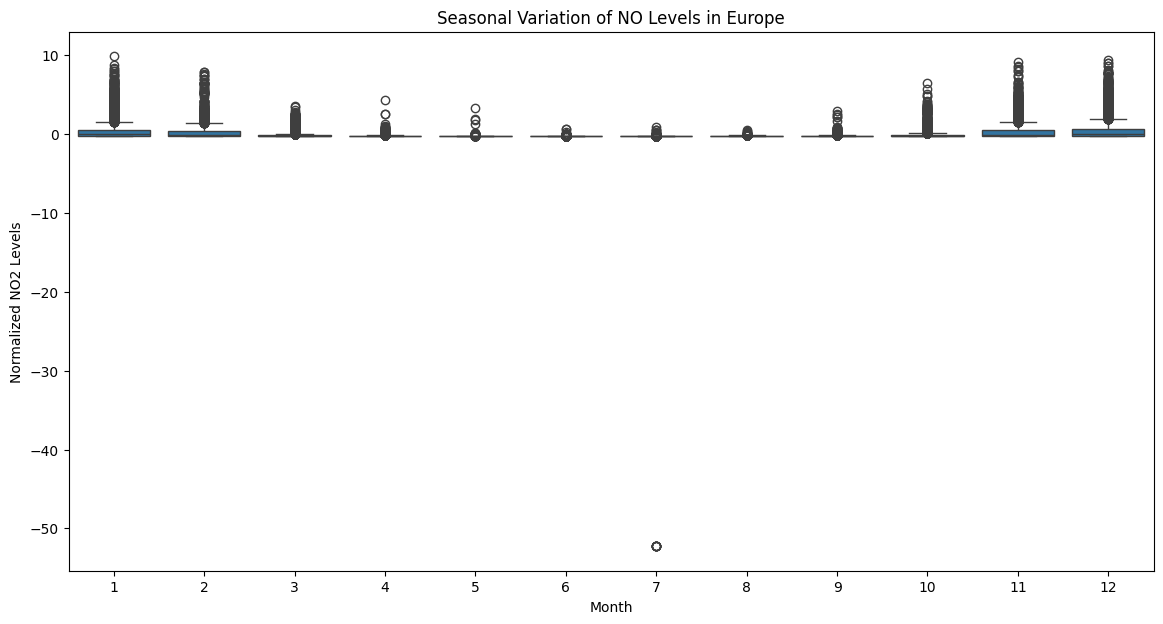

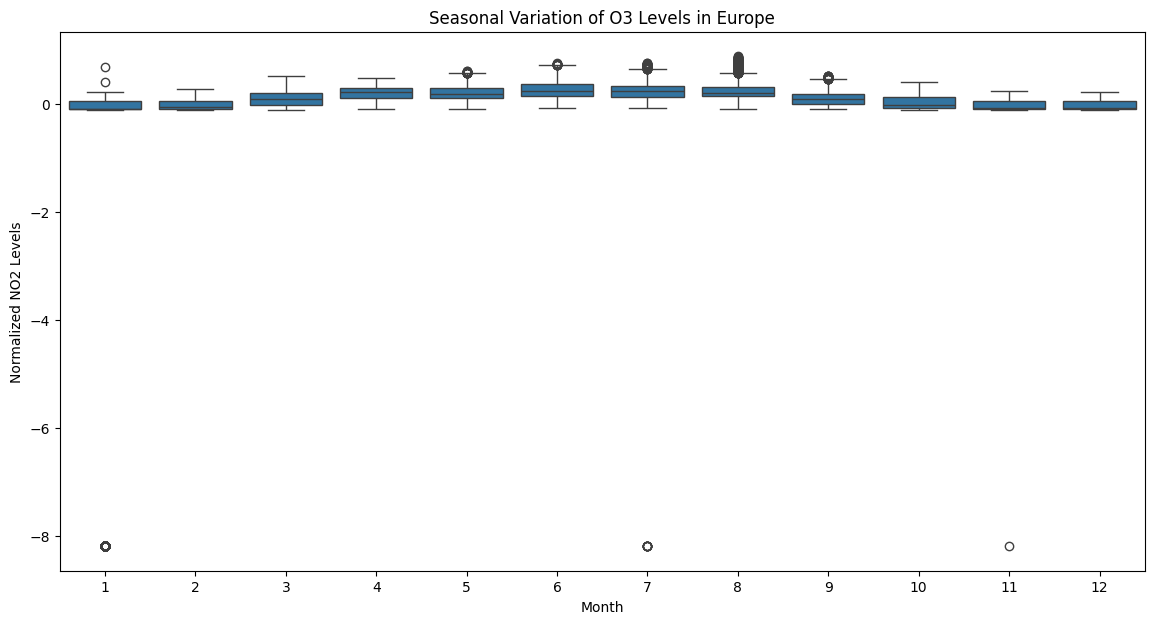

In [11]:
# Extracting month and year for seasonal analysis
air_quality_df['Month'] = air_quality_df['Date'].dt.month
inorganic_gases_df['Month'] = inorganic_gases_df['DateTime'].dt.month

# Seasonal analysis for Beijing data
plt.figure(figsize=(14, 7))
sns.boxplot(x='Month', y='High', data=air_quality_df)
plt.title('Seasonal Variation of High Air Quality Measurements in Beijing')
plt.xlabel('Month')
plt.ylabel('Normalized High Values')
plt.show()

# Seasonal analysis for European data NO2 levels
plt.figure(figsize=(14, 7))
sns.boxplot(x='Month', y='NO2', data=inorganic_gases_df)
plt.title('Seasonal Variation of NO2 Levels in Europe')
plt.xlabel('Month')
plt.ylabel('Normalized NO2 Levels')
plt.show()

# Seasonal analysis for European data NO levels
plt.figure(figsize=(14, 7))
sns.boxplot(x='Month', y='NO', data=inorganic_gases_df)
plt.title('Seasonal Variation of NO Levels in Europe')
plt.xlabel('Month')
plt.ylabel('Normalized NO2 Levels')
plt.show()

# Seasonal analysis for European data O3 levels
plt.figure(figsize=(14, 7))
sns.boxplot(x='Month', y='O3', data=inorganic_gases_df)
plt.title('Seasonal Variation of O3 Levels in Europe')
plt.xlabel('Month')
plt.ylabel('Normalized NO2 Levels')
plt.show()



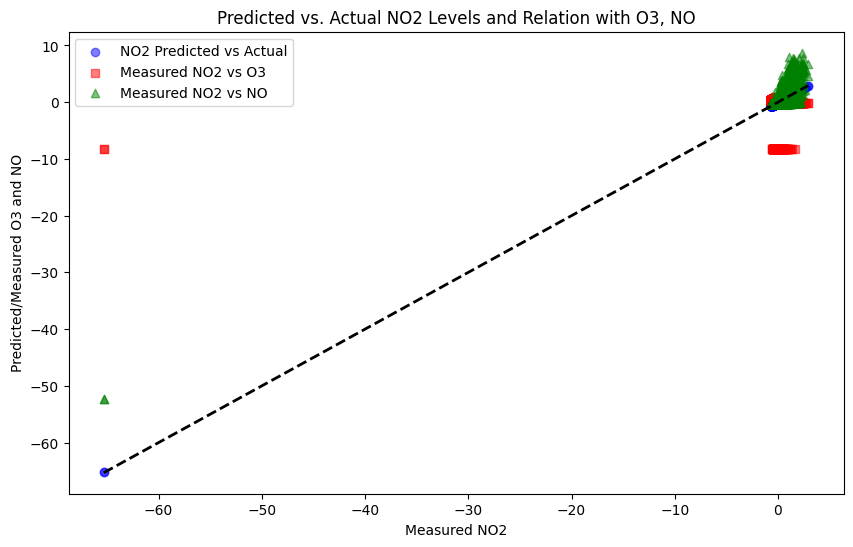

Mean Squared Error: 0.00032990400964256794
R-squared: 0.9997197686802703


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = inorganic_gases_df[['NO', 'NOx', 'SO2', 'CO_ppm']]
y = inorganic_gases_df['NO2']
o3 = inorganic_gases_df['O3']  
no = inorganic_gases_df['NO'] 

# Splitting data
X_train, X_test, y_train, y_test, o3_train, o3_test, no_train, no_test = train_test_split(
    X, y, o3, no, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))

# Measured vs Predicted NO2
plt.scatter(y_test, y_pred, alpha=0.5, color='b', label='NO2 Predicted vs Actual')

# Overlay O3 and NO on the same plot
plt.scatter(y_test, o3_test, alpha=0.5, color='r', marker='s', label='Measured NO2 vs O3')
plt.scatter(y_test, no_test, alpha=0.5, color='g', marker='^', label='Measured NO2 vs NO')

# Adding identity line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel('Measured NO2')
plt.ylabel('Predicted/Measured O3 and NO')
plt.title('Predicted vs. Actual NO2 Levels and Relation with O3, NO')
plt.legend()
plt.show()

# Metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
